# Pandas in Python

Pandas DataFrame:
The DataFrame is the epitome of tabular data representation in Pandas. Think of it as an Excel spreadsheet or a SQL table, where data is organized in rows and columns. Each column in a DataFrame is a Pandas Series, and together, they create a powerful and flexible structure for handling data.

In [1]:
import pandas as pd

In [2]:
# Creating a DataFrame from a dictionary
# Name is key and Age is key, City is key and others are values
data = {'Name': ['John', 'Alice', 'Bob'],
        'Age': [25, 28, 22],
        'City': ['New York', 'San Francisco', 'Seattle']}


In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Name,Age,City
0,John,25,New York
1,Alice,28,San Francisco
2,Bob,22,Seattle


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
type(df['City'])

pandas.core.series.Series

# Accessing Data:

In [7]:
# Accessing a specific column
names = df['Name']



In [8]:
names

,Name
0,John
1,Alice
2,Bob


In [13]:
# Slicing rows
subset = df[0:2]

In [14]:
subset

,Name,Age,City
0,John,25,New York
1,Alice,28,San Francisco


# Manipulating Data:

In [15]:
# Adding a new column
df['Salary'] = [50000, 60000, 55000]

In [16]:
df

,Name,Age,City,Salary
0,John,25,New York,50000
1,Alice,28,San Francisco,60000
2,Bob,22,Seattle,55000


In [19]:
# Filtering rows
youngsters = df[df['Age'] ==25]

In [20]:
youngsters

,Name,Age,City,Salary
0,John,25,New York,50000


**Pandas Series:**
A Series is essentially a one-dimensional array with labeled indices. It's the backbone of a DataFrame, and understanding it is crucial for effective data manipulation.

In [21]:
# Creating a Series:
# Creating a Series from a list
ages = pd.Series([25, 28, 22], name='Age')

In [22]:
ages

,Age
0,25
1,28
2,22


# Accessing and Manipulating:

In [25]:
# Accessing elements by index
first_age = ages[1]

In [26]:
first_age

28

In [27]:
# Applying a function to each element
ages_in_months = ages.apply(lambda x: x * 2)

In [28]:
ages_in_months

,Age
0,50
1,56
2,44


In [29]:
# Applying a function to each element
ages_in_months = ages.apply(lambda x: x +5 )

In [30]:
ages_in_months

,Age
0,30
1,33
2,27


# Filtering in Pandas

In [31]:
# Filtering based on age
young_employees = df[df['Age'] < 30]

In [32]:
young_employees

,Name,Age,City,Salary
0,John,25,New York,50000
1,Alice,28,San Francisco,60000
2,Bob,22,Seattle,55000


# Example: Using Logical Operators

In [33]:
# Filtering based on multiple conditions
young_high_earners = df[(df['Age'] < 30) & (df['Salary'] > 55000)]

In [34]:
young_high_earners

,Name,Age,City,Salary
1,Alice,28,San Francisco,60000


# Example: Using isin() Method

In [35]:
# Filtering based on a list of names
selected_names = df[df['Name'].isin(['Alice', 'Charlie'])]

In [36]:
selected_names

,Name,Age,City,Salary
1,Alice,28,San Francisco,60000


# Example: Using String Methods

In [43]:
# Filtering names starting with 'A'
a_names = df[df['Name'].str.startswith('A')]

In [44]:
a_names

,Name,Age,City,Salary
1,Alice,28,San Francisco,60000


# Example: Filtering Null Values

In [45]:

# Filtering rows with null values in the 'Salary' column
non_null_salaries = df[df['Salary'].notnull()]

In [46]:
non_null_salaries

,Name,Age,City,Salary
0,John,25,New York,50000
1,Alice,28,San Francisco,60000
2,Bob,22,Seattle,55000


# Pandas GroupBy and Aggregation

**Understanding GroupBy in Pandas:**
The GroupBy operation in Pandas is a two-step process: first, you split the data into groups based on a specified criterion, and then you apply a function to each group independently. Let's walk through the steps with an example:

In [70]:
# Creating a DataFrame
data = {'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 15, 20, 25, 30, 35],
        'Subcategory':['Delhi','Goa','Goa','Delhi','Goa','Goa'],
        'OtherValue':[101, 125, 210, 235, 350, 35]}

In [71]:
type(data)

dict

In [72]:
df = pd.DataFrame(data)

In [73]:
df

,Category,Value,Subcategory,OtherValue
0,A,10,Delhi,101
1,B,15,Goa,125
2,A,20,Goa,210
3,B,25,Delhi,235
4,A,30,Goa,350
5,B,35,Goa,35


In [52]:
# Grouping by 'Category'
grouped = df.groupby('Category')

In [54]:
print(grouped)

# Applying Aggregation Functions:

In [55]:
# Applying aggregation functions
sum_values = grouped['Value'].sum()

In [56]:
sum_values

,Value
Category,
A,60
B,75


In [57]:
average_values = grouped['Value'].mean()
average_values

,Value
Category,
A,20.0
B,25.0


In [58]:
max_values = grouped['Value'].max()
max_values

,Value
Category,
A,30
B,35


In [59]:
min_values = grouped['Value'].min()
min_values

,Value
Category,
A,10
B,15


In [61]:
count_values = grouped['Value'].count()
count_values

,Value
Category,
A,3
B,3


In [65]:
data

{'Category': ['A', 'B', 'A', 'B', 'A', 'B'],
 'Value': [10, 15, 20, 25, 30, 35],
 'Subcategory': ['Delhi', 'Goa', 'Pune', 'Delhi', 'Goa', 'Pune'],
 'OtherValue': [101, 125, 210, 235, 350, 35]}

In [74]:
# Grouping by multiple columns
grouped_multiple = df.groupby(['Category', 'Subcategory'])

# Applying multiple aggregation functions
result = grouped_multiple.agg({'Value': ['sum', 'mean'], 'OtherValue': 'max'})

In [76]:
df

,Category,Value,Subcategory,OtherValue
0,A,10,Delhi,101
1,B,15,Goa,125
2,A,20,Goa,210
3,B,25,Delhi,235
4,A,30,Goa,350
5,B,35,Goa,35


In [75]:
result

Value       OtherValue
                       sum  mean        max
Category Subcategory                       
A        Delhi          10  10.0        101
         Goa            50  25.0        350
B        Delhi          25  25.0        235
         Goa            50  25.0        125

# Moving Averages in Pandas

In [77]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [78]:
# Define the stock symbol and fetch historical data
stock_symbol = 'AAPL'  # Example: Apple Inc.
data = yf.download(stock_symbol, start='2020-01-01', end='2021-12-31')

[*********************100%***********************]  1 of 1 completed


In [79]:
stock_symbol

'AAPL'

In [80]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876106,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167625,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400536,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565193,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,173.629761,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,177.618881,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,176.594498,79144300


In [81]:
# Calculate 50-day Simple Moving Average (SMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()

In [82]:
data['SMA_50']

,SMA_50
Date,
2020-01-02,NaN
2020-01-03,NaN
2020-01-06,NaN
2020-01-07,NaN
2020-01-08,NaN
...,...
2021-12-23,158.865601
2021-12-27,159.597001
2021-12-28,160.286001


In [83]:
# Calculate 20-day Exponential Moving Average (EMA)
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()

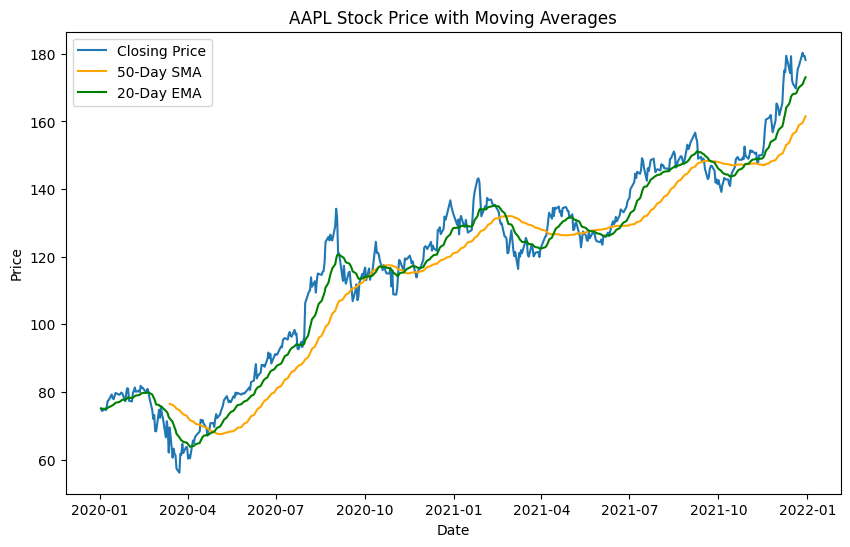

In [84]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Closing Price')
plt.plot(data.index, data['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(data.index, data['EMA_20'], label='20-Day EMA', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'{stock_symbol} Stock Price with Moving Averages')
plt.legend()
plt.show()

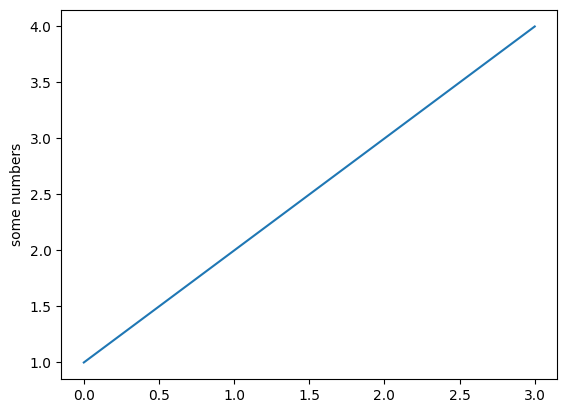

In [85]:
import matplotlib.pyplot as plt

# Simple plot example
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

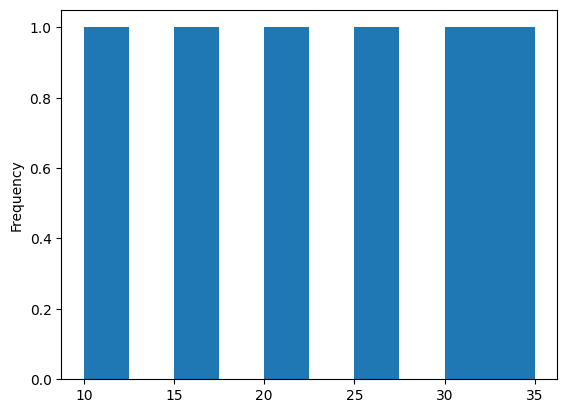

In [89]:
# Creating a histogram
df['Value'].plot(kind='hist', bins=10)
plt.show()

